### SVM尝试寻找一个最优的决策边界,距离两个类别的最近的样本最远
### SVM要最大化margin, Hard Margin SVM,  Soft Margin SVM
### margin = 2d , SVM要最大化d

#### (x, y) 到 Ax + By + C = 0 的距离 | Ax + By + C |/ sqrt(A **2 + B **2)
#### 拓展到n维空间, wT x + b = 0 , | wT x + b | / ||w|| , ||w|| = sqrt(w1 ** 2 + w2 ** 2 + ... + wn ** 2) 
#### min 1/2 * ||w|| ** 2

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data
y = iris.target

In [4]:
X.shape, y.shape

((150, 4), (150,))

In [5]:
X = X[y<2, :2]
y = y[y<2]

In [6]:
X.shape, y.shape

((100, 2), (100,))

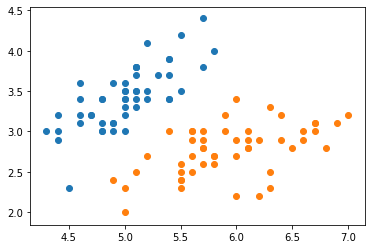

In [7]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

#### 和kNN一样，要做数据标准化处理理！涉及距离！

In [8]:
stand_scale = StandardScaler()

In [9]:
stand_scale.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
X_transform = stand_scale.transform(X)

### min 1/2 ||w|| ** 2 + C∑ζi

### C=1e4  , C越大，容错越小，C越小，容错越高

In [11]:
svc = LinearSVC(C=1e4)

In [12]:
svc.fit(X_transform, y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=10000.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [13]:
svc.coef_, svc.intercept_

(array([[ 4.03101755, -2.5060403 ]]), array([0.92698747]))

In [14]:
# 决策边界的公共方法
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


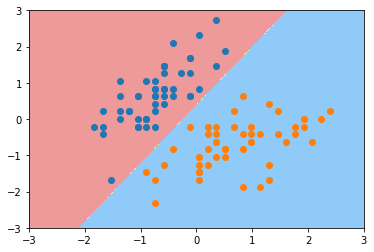

In [15]:
plot_decision_boundary(svc, [-3, 3, -3, 3])
plt.scatter(X_transform[y==0, 0], X_transform[y==0, 1])
plt.scatter(X_transform[y==1, 0], X_transform[y==1, 1])

### C=0.01

In [16]:
svc01 = LinearSVC(C=0.01)

In [17]:
svc01.fit(X_transform, y)

LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


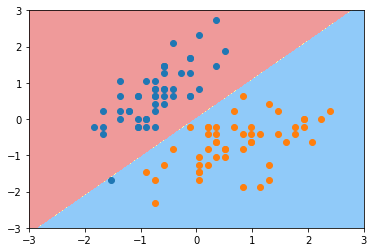

In [18]:
plot_decision_boundary(svc01, [-3, 3, -3, 3])
plt.scatter(X_transform[y==0, 0], X_transform[y==0, 1])
plt.scatter(X_transform[y==1, 0], X_transform[y==1, 1])

#### w0 * x0 + w1 * x1 + b = 0, w0 * x0 + w1 * x1 + b = 1, w0 * x0 + w1 * x1 + b = -1 
#### y_up = (1 - b - w0 * x0) / w1, y_down =  (-1 - b - w0 * x0) / w1,

In [19]:
# 决策边界的公共方法
def plot_margin_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)
    
    w = np.empty(2)
    w[0] = model.coef_[0][0]
    w[1] = model.coef_[0][1]
    
    
    b = model.intercept_[0]
    x_plot = np.linspace(axis[0], axis[1], 100)
    
    y_up = (1 - b - w[0] * x_plot) / w[1]
    y_down = (-1 - b - w[0] * x_plot) / w[1]
    up_index = (y_up > axis[2]) & (y_up < axis[3])
    down_index = (y_down > axis[2]) & (y_down < axis[3])
    
    plt.plot(x_plot[up_index], y_up[up_index])
    plt.plot(x_plot[down_index], y_down[down_index])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


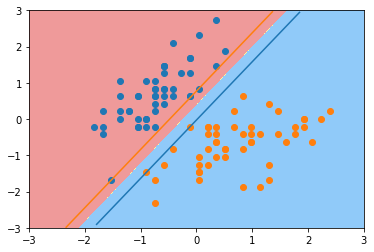

In [20]:
#C=1e4
plot_margin_decision_boundary(svc, [-3, 3, -3, 3])
plt.scatter(X_transform[y==0, 0], X_transform[y==0, 1])
plt.scatter(X_transform[y==1, 0], X_transform[y==1, 1])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


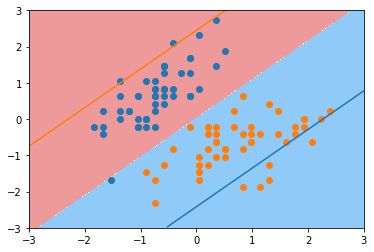

In [21]:
#C=0.01
plot_margin_decision_boundary(svc01, [-3, 3, -3, 3])
plt.scatter(X_transform[y==0, 0], X_transform[y==0, 1])
plt.scatter(X_transform[y==1, 0], X_transform[y==1, 1])